## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

## Data dictionary

In [2]:
# Loan_ID: Unique Loan ID issued on every loan for a applicant, dtype: Object.
# Gender: Gender of a applicant whether male or female, dtype: string.
# Married: Martial status of a applicant i.e., Yes for married and NO for single, dtype: string.
# Dependents: Number of individuals who are financially dependent on applicant, dtype: integer.
# Education: Highest Education of applicant i.e, Bachelor, Post Graduation etc, dtype: string.
# Self_employed: Whether the applicant is self employed or not i.e, Yes for self employed or else NO, dtype: string.
# ApplicantIncome: Income of the applicant, dtype: integer.
# CoApplicantIncome: Applicant have to put one nominee name that is called CoApplicant. So, it is column releated to coapplicant income, dtype: Integer.
# Loan Amount: Amount of loan applicant wants to issue from the bank.
# Loan_Amount_Term: The amount of time the lender gives you to repay your whole loan, dtype: float.
# Credit_History: It tells about the credit done in the past by the applicant, dtype: Integer.
# Property_Area: This tells about the applicant property is in which area i.e., Rural or Urban, dtype: String.
# Loan_status: It is a target variable column which tells about whether the applicant application for loan approval is passed or not, dtype: String.


## Load dataset

In [3]:
df_orig = pd.read_excel('Consumer creditworthiness train data.xlsx')

## Copy original dataframe to make a working copy

In [4]:
df = df_orig.copy()

## View dataset characteristics and data values


In [5]:
#No. of rows and columns
df_orig.shape

(521, 13)

In [6]:
#View the data
df_orig.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [7]:
#Check datatypes of data
df_orig.dtypes

Loan_ID                int64
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Warnings suspension

In [8]:
warnings.filterwarnings('ignore')

In [9]:
#Any row having missing Loan_ID
df_orig['Loan_ID'].isnull().sum()

0

## Columns having null values and not having null values

In [10]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


In [11]:
#Count of null values for each column
df.isna().sum().sort_values(ascending=False)

Credit_History       43
Self_Employed        27
Loan_Amount_Term     14
Dependents           13
Gender               10
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Property_Area         0
Loan_Status           0
dtype: int64


# Not having null values
- Loan_ID
- Education
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Property_Area
- Loan_Status

# Having null values
- Gender
- Married
- Dependents
- Self_Employed
- Loan_Amount_Term
- Credit_History


In [12]:
## Treat Null values
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [13]:
#Count of null values for each column after treating null values
df.isna().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
#Count distinct values for Loan Status
df['Loan_Status'].value_counts()

Y    358
N    163
Name: Loan_Status, dtype: int64

In [15]:
## Label Target feature(Loan_Status) as 1/0 in working copy dataframe

In [16]:
df['Loan_Status'] = np.where(df['Loan_Status']=="Y",1,0)

## Statistical validation for categorical features (Chi-square Test)

# Hypothesis Testing 
## Null hypothesis : 
- Independent feature have no impact on Target variable

## Alternate hypothesis : 
- Independent feature have impact on Target variable

In [17]:
contingency_gender = pd.crosstab(df_orig['Gender'], df_orig['Loan_Status'])
contingency_gender

Loan_Status,N,Y
Gender,,
Female,32,64
Male,127,288


In [18]:
c, p_gender, dof, expected = chi2_contingency(contingency_gender)

In [19]:
contingency_married = pd.crosstab(df_orig['Married'], df_orig['Loan_Status'])
contingency_married

Loan_Status,N,Y
Married,,
No,68,115
Yes,95,240


In [20]:
c, p_married, dof, expected = chi2_contingency(contingency_married)

In [21]:
contingency_dependents = pd.crosstab(df_orig['Dependents'], df_orig['Loan_Status'])
contingency_dependents

Loan_Status,N,Y
Dependents,,
0,94,205
1,32,52
2,18,66
3+,15,26


In [22]:
c, p_dependents, dof, expected = chi2_contingency(contingency_dependents)

In [23]:
contingency_education = pd.crosstab(df_orig['Education'], df_orig['Loan_Status'])
contingency_education

Loan_Status,N,Y
Education,,
Graduate,117,291
Not Graduate,46,67


In [24]:
c, p_education, dof, expected = chi2_contingency(contingency_education)

In [25]:
contingency_self_employed = pd.crosstab(df_orig['Self_Employed'], df_orig['Loan_Status'])
contingency_self_employed

Loan_Status,N,Y
Self_Employed,,
No,134,293
Yes,21,46


In [26]:
c, p_self_employed, dof, expected = chi2_contingency(contingency_self_employed)

In [27]:
contingency_property_area = pd.crosstab(df_orig['Property_Area'], df_orig['Loan_Status'])
contingency_property_area

Loan_Status,N,Y
Property_Area,,
Rural,60,88
Semiurban,42,155
Urban,61,115


In [28]:
c, p_property_area, dof, expected = chi2_contingency(contingency_property_area)

In [29]:
print("p-value for Gender:",p_gender)
print("p-value for Married:", p_married)
print("p-value for Dependents:", p_dependents)
print("p-value for Education:", p_education)
print("p-value for Self-Employed:", p_self_employed)
print("p-value for Property Area:", p_property_area)

p-value for Gender: 0.6902367665572007
p-value for Married: 0.04969152864604629
p-value for Dependents: 0.10472909943994584
p-value for Education: 0.019997766888094164
p-value for Self-Employed: 0.8923843783960755
p-value for Property Area: 0.00034748077291321715


## Outcome of hypothesis testing for categorical features
- p-value in case of Gender, Dependents, Self-Employed is > 5%. It means we accept null hypothesis.
    - These features have no impact on target variable.
- p-value in case of Married, Education, Property_Area is < 5%. It means we reject the null hypothesis.
    - These features have impact on target variable.

# Statistical validation of numerical features (ANOVA test)

## Hypothesis Testing 
### Null hypothesis : 
- Independent feature have no impact on Target variable

### Alternate hypothesis : 
- Independent feature have impact on Target variable

####  Standardize the data having large values by dividing the values by std deviation of data.

In [30]:
df['LoanAmount'] = df['LoanAmount']/np.std(df['LoanAmount'])
df['ApplicantIncome'] = df['ApplicantIncome']/np.std(df['ApplicantIncome'])
df['CoapplicantIncome'] = df['CoapplicantIncome']/np.std(df['CoapplicantIncome'])
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/np.std(df['Loan_Amount_Term'])

In [31]:
stats, p_loan_amount = f_oneway(df['LoanAmount'],df['Loan_Status'])

In [32]:
stats, p_applicantincome = f_oneway(df['ApplicantIncome'],df['Loan_Status'])

In [33]:
stats, p_coapplicantincome = f_oneway(df['CoapplicantIncome'],df['Loan_Status'])

In [34]:
stats, p_loan_amount_term = f_oneway(df['Loan_Amount_Term'],df['Loan_Status'])

In [35]:
stats, p_credit_history = f_oneway(df['Credit_History'],df['Loan_Status'])

In [36]:
print("p-value for Loan Amount:",p_loan_amount)
print("p-value for Applicant Income:", p_applicantincome)
print("p-value for Co Applicant Income:", p_coapplicantincome)
print("p-value for Loan Amount Term:", p_loan_amount_term)
print("p-value for Credit History:", p_credit_history)

p-value for Loan Amount: 4.382907408721039e-73
p-value for Applicant Income: 0.0008524533546734464
p-value for Co Applicant Income: 0.42929798286039866
p-value for Loan Amount Term: 0.0
p-value for Credit History: 1.7471778665369022e-11


## Outcome of hypothesis testing
- p-value in case of Co Applicant Income is > 5%. It means we accept null hypothesis.
    - This feature have no impact on target variable.
- p-value in case of Loan Amount, Applicant Income,Loan Amount Term, Credit History is < 5%. It means we reject the null hypothesis.
    - These features have impact on target variable.

## Plots for numerical features

In [37]:
X = df
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')
#Drop Loan_ID feature as it has no impact on target feature
num.drop('Loan_ID',axis=1,inplace=True)
# num.drop('Loan_Status',axis=1,inplace=True)

In [38]:
# Every numerical feature is highly skewed. Last 2 features are negatively skewed.
num.skew()

ApplicantIncome      6.480148
CoapplicantIncome    3.407483
LoanAmount           2.485041
Loan_Amount_Term    -2.376678
Credit_History      -2.079620
Loan_Status         -0.809566
dtype: float64

In [39]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.908629,0.000000,1.461253,5.7376,1.0,1
1,0.711959,0.703991,1.496323,5.7376,1.0,0
2,0.466043,0.000000,0.771541,5.7376,1.0,1
3,0.401263,1.100803,1.402803,5.7376,1.0,1
4,0.932087,0.000000,1.648293,5.7376,1.0,1


In [40]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [41]:
num_1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.908629,0.000000,1.461253,5.737600,1.0,1
1,0.711959,0.703991,1.496323,5.737600,1.0,0
2,0.466043,0.000000,0.771541,5.737600,1.0,1
3,0.401263,1.100803,1.402803,5.737600,1.0,1
4,0.932087,0.000000,1.648293,5.737600,1.0,1
...,...,...,...,...,...,...
516,0.315511,0.761879,1.320972,7.650134,1.0,1
517,0.477539,0.840307,1.437873,5.737600,0.0,0
518,0.727494,0.893994,2.162654,5.737600,1.0,0
519,0.528182,0.000000,1.110552,5.737600,1.0,0


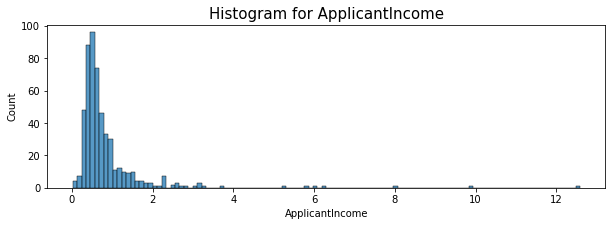

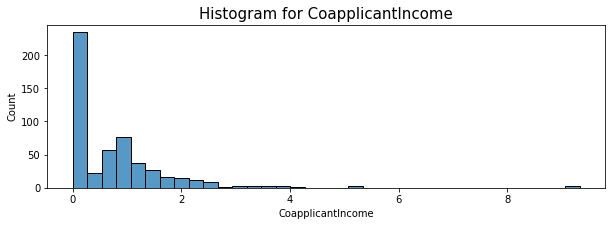

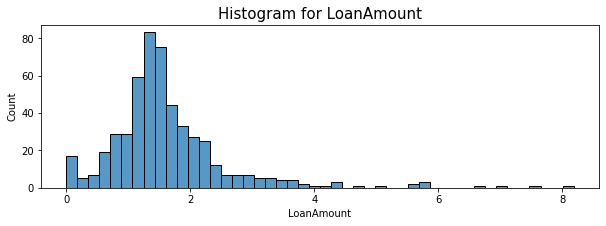

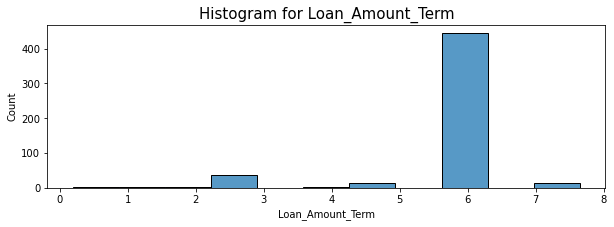

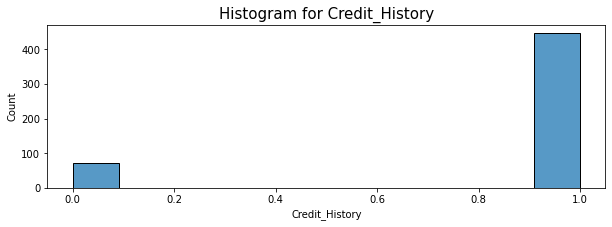

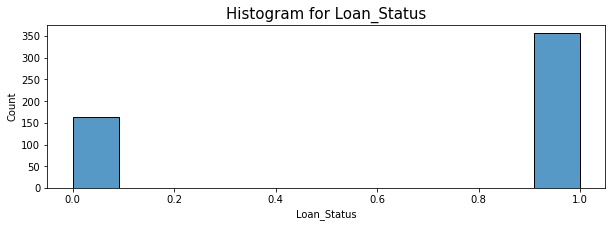

In [79]:
for col in num.columns:
    plt.figure(figsize=(10,3)) #X-axis, Y-axis
    plt.title('Histogram for'+" "+col, fontsize=15)
    sns.histplot(df[col])
    plt.show() 

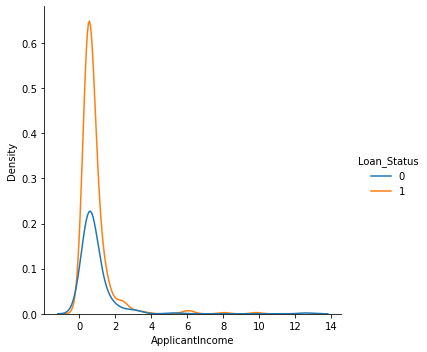

In [75]:
sns.displot(data=num, x='ApplicantIncome', hue='Loan_Status', kind='kde')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

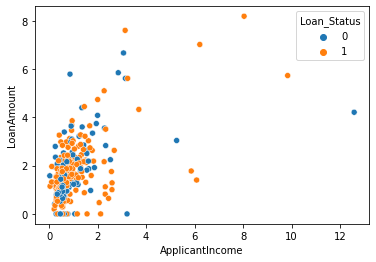

In [57]:
sns.scatterplot(x="ApplicantIncome",y="LoanAmount",data=num,hue="Loan_Status")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

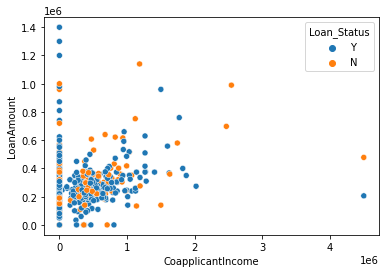

In [44]:
sns.scatterplot(x="CoapplicantIncome",y="LoanAmount",data=df_orig, hue="Loan_Status")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>

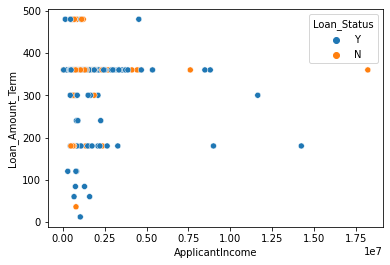

In [45]:
sns.scatterplot(x="ApplicantIncome",y="Loan_Amount_Term",data=df_orig,hue="Loan_Status")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Amount_Term'>

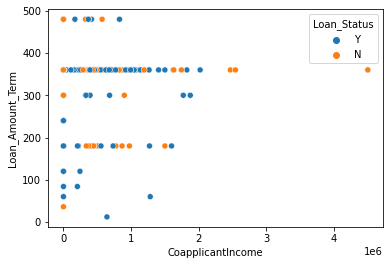

In [46]:
sns.scatterplot(x="CoapplicantIncome",y="Loan_Amount_Term",data=df_orig,hue="Loan_Status")

## Create correlation matrix for numerical features

In [47]:
df.drop('Loan_ID',axis=1,inplace=True)
corr = df.corr()

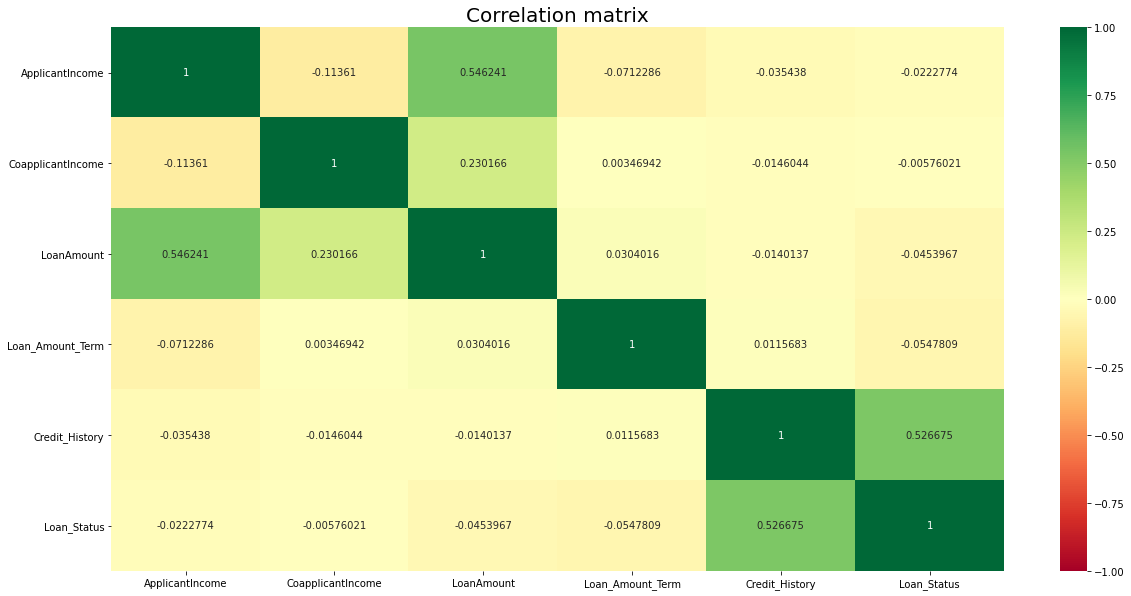

In [48]:
#Heatmap of correlation matrix
plt.figure(figsize=(20,10))
plt.title('Correlation matrix',fontsize=20)
sns.heatmap(corr,cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='g') #fmt creates scale appearing towards right
plt.show()

## Analysis of numerical features
- Credit History and Loan Status have a +ve correlation.
- Loan Amount and Applicant Income have a +ve correlation.
- Loan Amount and Co-Applicant Income have a +ve correlation.
- 50% of applicant have income between 646875.0 and 1292850.0 
- 50% of coapplicant have income between 0 and 517950.0
- 50% of the loan given have an amount between 196000.0 and 320000.0
- 50% of the loan have a tenure of 360 months.


## Analysis of categorical features
- Married people have higher chance of loan approval as compared to unmarried people
- People having 2 dependents are more likely to get Loan approval
- Graduate people have higher chance for getting loan approval
- More loans are approved for Semiurban property
- Self employement have not much significance on loan approval
- Male borrower have slightly higher chance of loan approval as compared to female borrrower
- Credit history have a huge influence on getting loan approval.Person having credit history is more likely to get loan approval as compared to person having no credit history

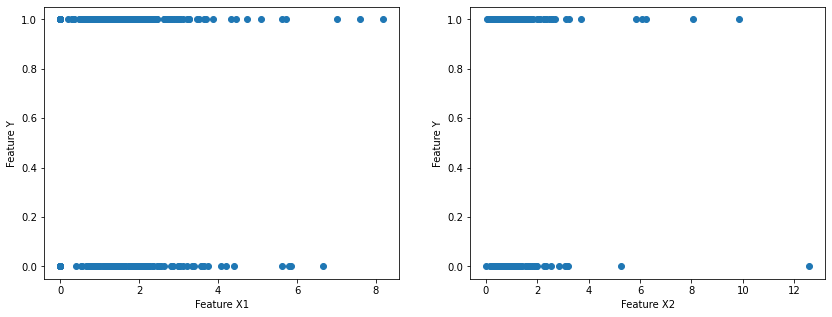

In [52]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(num['LoanAmount'], num['Loan_Status'])
plt.ylabel('Feature Y')
plt.xlabel('Feature X1')

plt.subplot(1,2,2)
plt.scatter(df['ApplicantIncome'], df['Loan_Status'])
plt.ylabel('Feature Y')
plt.xlabel('Feature X2')

plt.show()

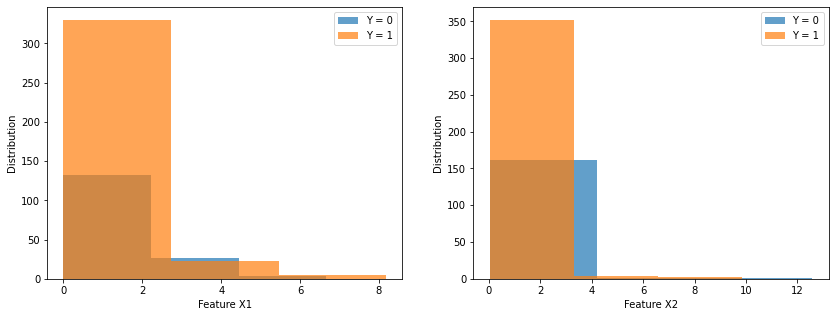

In [53]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(num['LoanAmount'][num['Loan_Status'] == 0], bins=3, alpha = 0.7, label = 'Y = 0')
plt.hist(num['LoanAmount'][df['Loan_Status'] == 1], bins=3, alpha = 0.7, label = 'Y = 1')
plt.ylabel('Distribution')
plt.xlabel('Feature X1')
plt.legend()

plt.subplot(1,2,2)
plt.hist(num['ApplicantIncome'][df['Loan_Status'] == 0], bins=3, alpha = 0.7, label = 'Y = 0')
plt.hist(df['ApplicantIncome'][df['Loan_Status'] == 1], bins=3, alpha = 0.7, label = 'Y = 1')
plt.ylabel('Distribution')
plt.xlabel('Feature X2')
plt.legend()

plt.show()

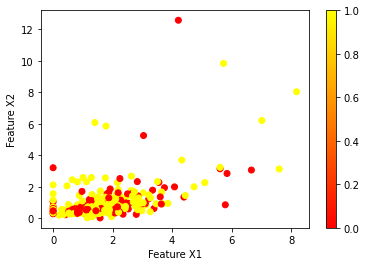

In [54]:
plt.scatter(num['LoanAmount'], num['ApplicantIncome'], c = num['Loan_Status'], cmap = 'autumn')
plt.ylabel('Feature X2')
plt.xlabel('Feature X1')
plt.colorbar()
plt.show()